## A Hands-on Workshop series in Machine Learning
### Session 3: Classification Algorithms 
#### Instructor: Aashita Kesarwani

This is one of the notebooks for the fourth session of the [Machine Learning workshop series at Harvey Mudd College](http://www.aashitak.com/ML-Workshops/). It involves a gentle introduction of logistic regression and a brief overview of the various classification algorithms with illustrative examples. 

Topics covered:
- Logistic Regression
- k-Nearest Neighbours
- Support Vector Machines
- Voting Classifiers

### Classification: 
- Predicting a label to classify the data points.
- Finding a decision boundary using a labeled training dataset to determine labels for unseen data.

An example of binary classification algorithm: Logistic regression - separates the classes using a linear boundary 

<img src="https://camo.githubusercontent.com/f663cd4f29335972950dded4d422c07aeee8af55/68747470733a2f2f63646e2d696d616765732d312e6d656469756d2e636f6d2f6d61782f313630302f312a34473067737539327250684e2d636f397076315035414032782e706e67" width="300" height="350" />
<p style="text-align: center;"> Logistic Regression classifier </p>

The logistic classifier, also known by its misnomer logistic regression, is one of the simplest cases of the neural networks pared-down to a single layer.

For binary classification, we assign the two classes the labels 0 and 1.
* The class labeled 1 is also called the positive class. 
* The class labeled 0 is also called the negative class. 


In general, we would want our classifier to give us the probabilities corresponding to each class, instead of the class label. Can you guess why?

Ans: The examples farther from the decision boundary should be classified with more certainity (or higher probability) than those closer to the decision boundary.

* The classifier predicts the probability ($p$) that an observation belongs to the positive class. 
* The probability for the class labeled $0$ (or the negative class) would be $1-p$.

Q: How do we mathematically quantify how close a point is to the decision boundary?

To answer that, let us first clearly formulate the classification model:
* Our training set consists of pairs, say (input, target) where the target is the class label - $0$ or $1$. 
* Let there be $n$ features in our dataset, then each input can be considered a point $(x_1, x_2, \dots, x_n)$ in the $n$-dimensional space.

The classification task is to find the optimal decision boundary to separate the classes. For the logistic regression, this boundary is linear. 

* For the case of two features, this linear boundary is simply a line in 2-dimensional plane.
* For three features, the linear boundary would be a linear plane separating the two classes in 3-dimensional plane.
* In general, the linear boundary is a $n-1$ dimensional linear hyperplane in a $n$-dimensional space.

<img src="https://camo.githubusercontent.com/f663cd4f29335972950dded4d422c07aeee8af55/68747470733a2f2f63646e2d696d616765732d312e6d656469756d2e636f6d2f6d61782f313630302f312a34473067737539327250684e2d636f397076315035414032782e706e67" width="300" height="350" />
<p style="text-align: center;"> Logistic Regression classifier </p>


To be able to visualize and understand intuitively, let us use only two features, say $x_1$ and $x_2$. Let us assume the following line $x_1-x_2-1=0$ is the linear decision boundary for the logistic classifier in the figure above.


Math question: We represent the following line using the equation $x_1-x_2-1=0$. How do we mathematically represent the two regions that are separated by this line?

![](https://github.com/AashitaK/ML-Workshops/blob/master/Session%204/figures/fig1.png?raw=true)

The region containing the origin is given by $x_1-x_2-1<0$ whereas the other one by $x_1-x_2-1>0$.

![](https://github.com/AashitaK/ML-Workshops/blob/master/Session%204/figures/fig2.png?raw=true)

The expression $x_1-x_2-1$ have values higher in magnitude for points away from the line and lower values for points closer to the line.

![](https://github.com/AashitaK/ML-Workshops/blob/master/Session%204/figures/figure3.png?raw=true)

To summarize in a nutshell, the expression $w_1*x_1 + w_2*x_2 + \cdots + w_n*x_n + b$ can be used to quantify how close a point is to the decision boundary and if use we combine it with a suitable function, it can give us the probability for the positive class. The **sigmoid logistic function** is used for this purpose as follows:

$$Prob(y=1) = sig(w_1*x_1 + w_2*x_2 + \cdots + w_n*x_n + b) $$ 

where $sig$ is the sigmoid logistic function 
$$sig(t) = \frac{1}{1+e^{-t}}$$

<img src="https://upload.wikimedia.org/wikipedia/commons/5/53/Sigmoid-function-2.svg" width=400 />

The S-shaped curve is called sigmoid because of its shape and it was widely used in population growth models in the previous century and hence, the [name logistic](https://en.wikipedia.org/wiki/Logistic_function).

Observations:
* The output of the sigmoid lies between 0 and 1, which corresponds to the probability in our case. 
* The logistic function (and hence the probability) approximates to 1 for large positive values, whereas it converges to 0 for large negative values. 
* The value for $w_1*x_1 + w_2*x_2 + \cdots + w_n*x_n + b$ is positive for points in the region on one side of the line and negative for the other. The magnitude of the values (positive or negative) is higher for points far away from the line.
* In view of the above equation for logistic regression and the properties of sigmoid logistic function, the points farther away from the line will be classified with a high probability to one class or the other, whereas the probability will be closer to 0 for points close to the line.
 
In general, we set the threshold for probability to be 0.5. This means:
* Whenever $w_1*x_1 + w_2*x_2 + \cdots + w_n*x_n + b \geq 0$, it is classified to the positive class 
* Whenever $w_1*x_1 + \cdots + w_n*x_n + b < 0$, it is classified to the negative class. 
* The points for which the value for $w_1*x_1 + \cdots + w_n*x_n + b$ is not large in magnitude have probabilities that are closer to 0.5. Such points needs to be classified with extra care, as we will see later on in evaluation metrics. 

To learn a good decision boundary, we need to find out optimal weights using the training data. How can we make use of our training data for that purpose?



Let us use an example for illustration.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

from sklearn import datasets
iris = datasets.load_iris()

df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df['class'] = iris['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


The iris dataset is a classic dataset used in machine learning. It consists of iris flowers that fall into three species (setosa, virginica, and versicolor) with four measurements for each flower.

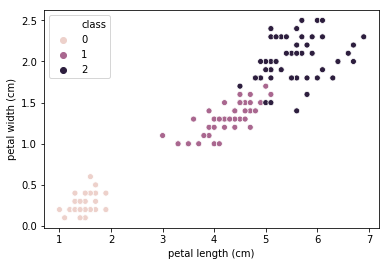

In [2]:
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='class', data=df);

We will focus on classifying between species 1 and 2, so we will drop class 0 and rename classes 1 and 2 as 0 and 1 respectively.

In [3]:
df = df[df['class']!=0]
df['class'].replace({1: 0, 2: 1}, inplace=True)

In [4]:
df['class'].value_counts()

1    50
0    50
Name: class, dtype: int64

In [5]:
x_min, x_max = df['petal length (cm)'].min(), df['petal length (cm)'].max()

def plot_line(w, b, color):
    x_values = np.linspace(x_min, x_max, 100)
    y_values = w*x_values + b
    plt.plot(x_values, y_values, color)

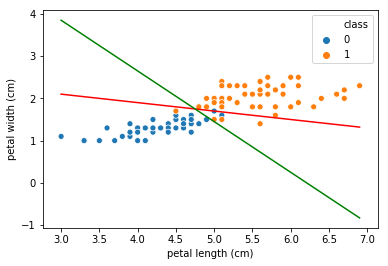

In [6]:
plot_line(w=-0.2, b=2.7, color='r-');
plot_line(w=-1.2, b=7.45, color='g-');
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='class', data=df);

To learn the weights $w_1, w_2, \dots, w_n$ and $b$, we quantify the error of misclassification using the cost function called the cross-entropy log loss defined below.

For points with label $y=1$, the cost is

$$ c(y, p) = - \log(p) \ \ \ \ \ \ \ \ \ \text{ if }\ \  y = 1$$

whereas for points with label $y=0$, the cost is

$$ c(y, p) = - \log(1-p) \ \  \text{ if }\ \  y = 0$$

<img src="https://houxianxu.github.io/images/logisticRegression/3.png" width="350" height="450" />

The cost function takes the average over the costs for all points. The costs for the two classes $y=0$ and $y=1$ can be summed up in the following formula.

$$ J = \frac{1}{N} \sum_{i=1}^N c(y, p) = - \frac{1}{N} \sum_{i=1}^N y \log(p) + (1-y) \log(1-p)$$

where $p=Prob(y=1)$, which is the output of our logistic regression classifier.

*Q: Why do we use this log loss as the cost function to model the logistic classifier with the linear decision boundary?  
A: The answer requires some understanding of probability and statistics. Maximizing the log-likelihood function for the logistic regression model leads to this log loss cost function. See [here](http://rasbt.github.io/mlxtend/user_guide/classifier/LogisticRegression/) and [here](https://houxianxu.github.io/2015/04/23/logistic-softmax-regression/). If you have not yet learned the probability concepts in much depth, it would be Okay to skip the derivation for the time being. You would still be able to follow the rest. When we will proceed to the neural networks based on our understanding of logistic regression, this probabilistic interpretation will no longer be relevant and hence, it has been skipped from the notes.*

The cost function $J$ is consequently a function of the weights $w_1, w_2, \dots, w_n$ and the bias term $b$, that is $J(w_1, w_2, \dots, w_n, b)$. Can you see how?

As we saw above, the data points in the figure are given to us, whereas it is the the decision boundary that we can adjust to minimize the error of the classification.

To rephrase it, the training set with the pairs of input $x$ and the target $y$ is given to us. It is the weights $w_1, w_2, \dots, w_n$ and the bias term $b$ that we can adjust to minimize the cost function.

How do we find the optimal values for $w_1, w_2, \dots, w_n$ and $b$ to minimize $J$?

To answer that, let us digress a little bit.

Suppose you are standing at the top of a hill and want to descend to the plain. If you do not have any specific destination in mind, but want to take the least number of steps to reach the plain, what would be your **strategy for each step on your way**? 

Have you noticed the paths followed by the creeks along the mountains? 

Ans: You pick the direction of the steepest descent at each step.

Let us formulate this optimization strategy in mathematical terms. 

Q: Given a curve represented by a function $J(w)$, how do you get the slope of the curve at each point?

Q: Given a curve represented by a multi-variable function $J(w_1, w_2, \dots, w_n, b)$, how do you get the slope of the curve at each point?

##### What are gradients?
Gradients can be thought of as an extension of derivatives. For a multivariable function $f$, the [gradient](https://www.khanacademy.org/math/multivariable-calculus/multivariable-derivatives/partial-derivative-and-gradient-articles/a/the-gradient) of $f$ is the vector of partial derivatives. 

$$ \nabla f(x_1, x_2, \dots, x_n) = \left(\frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}, \dots, \frac{\partial f}{\partial x_n} \right)$$

Geometrically, the gradient points in the direction of the steepest slope.

**Questions to ponder over:**
* If we move in the direction of steepest descent, are we always guaranteed to reach the minimum point?
* If the answer is no to the above questions, are there any cases for the function $J$ for which reaching the minima is guaranteed?

Neural networks also use the gradient descent algorithm for the training process and we will come back to this question in a later session.

##### Gradient Descent Algorithm
Gradient Descent algorithm is used to iteratively update the weights using the training examples so as to minimize the cost function $J$. 

The weights are updated in the direction of the steepest descent of the cost function $J$ in each iteration. 

$$ w := w - \alpha \nabla J $$

where $\nabla J$ is the gradient of the cost function $J$ and $\alpha$ is the learning rate that determines the size of steps that we take descending on the path of gradient.

<img src="https://rasbt.github.io/mlxtend/user_guide/general_concepts/gradient-optimization_files/ball.png" width="350" height="450" />
<p style="text-align: center;"> Minimizing the cost function using gradient descent </p> 

As an exercise, derive the following weight update formula by taking the gradient of the cost function $J$:

$$ w_j := w_j - \alpha \frac{1}{m} \sum_{i=1}^m (p^{(i)} - y^{(i)}) x_j^{(i)}  $$

where $m$ is the number of training examples.

In a nutshell, the learning process can be summarized as iteratively updating the weights using the training data to keep on ***minimizing the cost function***. The gist of the learning process for the neural network is the same, though the formulation of the cost function and the equation for calculating $y$ for a given $x$ will vary a lot depending on the architecture of the neural network. 

First we import python modules:

We will first generate a dataset suitable for demonstration and applying classification algorithms using built-in function [`make_classification`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) in scikit-learn.

Let us split the dataset into training and validation sets for the cross validation:

In [7]:
from sklearn.model_selection import train_test_split
# default is 75% / 25% train-test split
X, y = df.drop(columns=['class']), df['class']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=0)

We create a logistic classifier using [`sklearn.linear_model.LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [8]:
from sklearn.linear_model import LogisticRegression

LR_clf = LogisticRegression()

Next we train the classifier using the training data:

In [9]:
LR_clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Now, we test the accuracy of the classifier on both training and validation dataset.

In [10]:
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(LR_clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(LR_clf.score(X_valid, y_valid)))

Accuracy of Logistic regression classifier on training set: 0.97
Accuracy of Logistic regression classifier on test set: 0.92


The above binary classification dataset was clearly separable by linear boundary, but that is not the case often. Next, we generate another dataset that is not linearly separable.

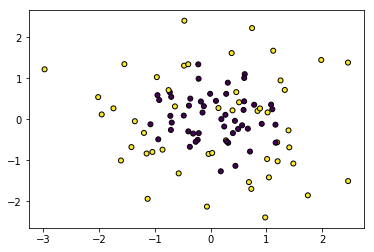

In [11]:
from sklearn.datasets import make_gaussian_quantiles
X1, y1 = make_gaussian_quantiles(n_features=3, 
                                 n_classes=2, 
                                 random_state=10)

plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=y1,
            s=25, edgecolor='k');

X1_train, X1_valid, y1_train, y1_valid = train_test_split(X1[:, 0:2], y1, random_state=0)

We build a logistic regression model on this dataset.

In [12]:
LR_clf2 = LogisticRegression().fit(X1_train, y1_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(LR_clf2.score(X1_train, y1_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(LR_clf2.score(X1_valid, y1_valid)))

Accuracy of Logistic regression classifier on training set: 0.44
Accuracy of Logistic regression classifier on test set: 0.36


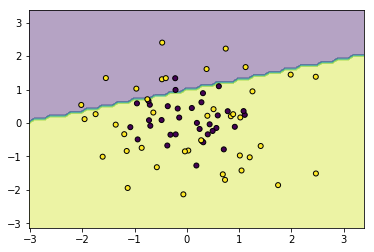

In [13]:
def plot_decision_boundary(model, X, y):
    x1, x2 = X[:, 0], X[:, 1]
    x1_min, x1_max = x1.min() - 1, x1.max() + 1
    x2_min, x2_max = x2.min() - 1, x2.max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
                         np.arange(x2_min, x2_max, 0.1))

    Z = model.predict(np.c_[xx1.ravel(), xx2.ravel()]).reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.4)
    plt.scatter(x1, x2, c=y, marker='o',
                s=25, edgecolor='k');
    
plot_decision_boundary(LR_clf2, X1_train, y1_train)

Logistic regression is perhaps not a good choice for this kind dataset. We will apply other classification algorithms to this dataset, namely:
- k-Nearest Neighbors
- Support Vector Machines (SVM)

#### k-Nearest Neighbors classifier:

The logic behind K-Nearest Neighbors classifier is really simple. We are given a training set that we make use of to classify an unseen example into one of the given classes, as follows:
* For an unseen example, the algorithm finds the nearest neighbors in the feature space. The number of neighbors is the parameter $k$.
* A majority vote among the classes of the $k$ neighbors predicts the class for the unseen example.

![](https://www.mathworks.com/matlabcentral/mlc-downloads/downloads/03faee64-e85e-4ea0-a2b4-e5964949e2d1/d99b9a4d-618c-45f0-86d1-388bdf852c1d/images/screenshot.gif)

Notes: 
* Unlike Logistic regression algorithm, studied above, kNN algorithm has no learning process. Most of the computation is performed at the prediction stage. 
* The default value for the number of neighbors $k$ is set as $5$ in `scikit-learn` implementation. 
* The nearness is quantified by a metric. The [Euclidean distance](https://www.cut-the-knot.org/pythagoras/DistanceFormula.shtml) is commonly used for continuous variables whereas [Hamming distance](https://www.tutorialspoint.com/what-is-hamming-distance) can be used for discrete variables. 
* For imbalanced datasets, where examples of one class far outnumber the other class, kNN is highly biased towards the majority class and is perhaps not a good choice.
 

Accuracy of K-NN classifier on training set: 0.77
Accuracy of K-NN classifier on test set: 0.72


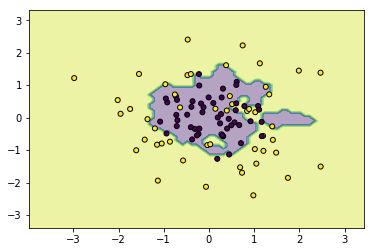

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier().fit(X1_train, y1_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_clf.score(X1_train, y1_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_clf.score(X1_valid, y1_valid)))

plot_decision_boundary(knn_clf, X1, y1)

Support Vector Machines (SVM):
- An extension of linear classification
- Separates the classes by choosing a hyperplane that maximizes the distance to the nearest data point on either side and hence known as maximum margin classifier.
- The data points that are closest to the decision boundary on either side are called support vectors.
- It minimize the classification error and at the same time maximizes the geometric margin 

<img src="https://upload.wikimedia.org/wikipedia/commons/7/72/SVM_margin.png" width="350" height="350" />
<p style="text-align: center;"> Support Vector Machines (SVM) classifier </p>


Using the kernel trick to transform the feature space, SVM can learn non-linear decision boundaries. 

<img src="https://upload.wikimedia.org/wikipedia/commons/1/1b/Kernel_Machine.png" width="350" height="350" />
<p style="text-align: center;"> Using Kernel trick for Support Vector Machines (SVM) classifier </p>

Accuracy of Support Vector classifier on training set: 0.79
Accuracy of Support Vector classifier on test set: 0.80


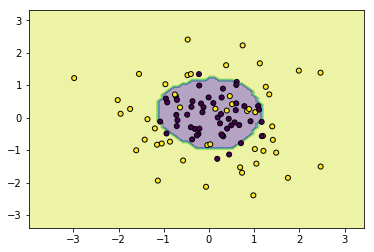

In [15]:
from sklearn.svm import SVC
svc_clf = SVC().fit(X1_train, y1_train)

print('Accuracy of Support Vector classifier on training set: {:.2f}'
     .format(svc_clf.score(X1_train, y1_train)))
print('Accuracy of Support Vector classifier on test set: {:.2f}'
     .format(svc_clf.score(X1_valid, y1_valid)))

plot_decision_boundary(svc_clf, X1, y1)

Smoother boundary usually suggests that it is less likely to be subjected to the noise and fluctations in training set and hence, less likely to over-fit. 

Many-a-times, we combine various algorithms whose predictions are more or less uncorrelated to build a model that often performs better than the individual models.

## Voting classifiers:
In machine learning, we often achieve better performance by ensembling various classifiers to predict a final output. There are different rules to combine the result from the classifiers:
* Hard voting: It uses simple majority rule.
* Soft voting: It averages the probabilities given by all the classifiers for each of thw classes and then picks the class with highest average probability as the prediction
* Soft voting with weights: Similar as above, but instead uses the [weighted average](https://sciencing.com/calculate-weighted-average-5328019.html). 

Please refer [here](http://rasbt.github.io/mlxtend/user_guide/classifier/EnsembleVoteClassifier/) for a more detailed illustration and explanation.



***Decision Tree classifier:***


Accuracy of Decision Tree classifier on training set: 0.85
Accuracy of Decision Tree classifier on test set: 0.76


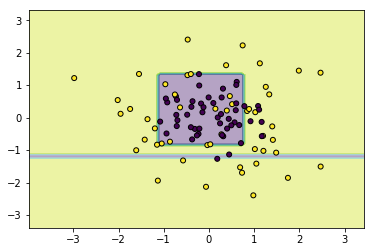

In [16]:
from sklearn.tree import DecisionTreeClassifier

DT_clf = DecisionTreeClassifier(max_depth=4).fit(X1_train, y1_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(DT_clf.score(X1_train, y1_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(DT_clf.score(X1_valid, y1_valid)))

plot_decision_boundary(DT_clf, X1, y1)

***Random Forest classifier:***

Accuracy of Random Forest classifier on training set: 1.00
Accuracy of Random Forest classifier on test set: 0.88


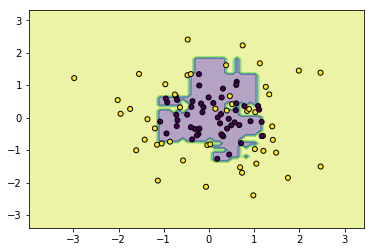

In [17]:
from sklearn.ensemble import RandomForestClassifier
RF_clf = RandomForestClassifier().fit(X1_train, y1_train)

print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(RF_clf.score(X1_train, y1_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(RF_clf.score(X1_valid, y1_valid)))

plot_decision_boundary(RF_clf, X1, y1)

We implement the ensemble for the voting classifiers using [`sklearn.ensemble.VotingClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html). First, we use the option of 'hard' voting that uses majority rule voting.

Accuracy of Hard Voting classifier on training set: 0.83
Accuracy of Hard Voting classifier on test set: 0.76


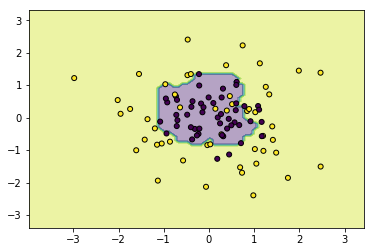

In [18]:
# Hard Voting
from sklearn.ensemble import VotingClassifier

eclf1 = VotingClassifier(estimators=[
            ('lr', LR_clf2), 
            ('dt', DT_clf), 
            ('knn', knn_clf),
            ('rf', RF_clf), 
            ('svc', svc_clf)], 
            voting='hard')

eclf1 = eclf1.fit(X1_train, y1_train)

print('Accuracy of Hard Voting classifier on training set: {:.2f}'
     .format(eclf1.score(X1_train, y1_train)))
print('Accuracy of Hard Voting classifier on test set: {:.2f}'
     .format(eclf1.score(X1_valid, y1_valid)))

plot_decision_boundary(eclf1, X1, y1)

Next, we try the option of 'soft' voting that sums the probabilities for all classifiers in the ensemble and then picks the class with the highest average probability.

Accuracy of Soft Voting classifier on training set: 0.92
Accuracy of Soft Voting classifier on test set: 0.76


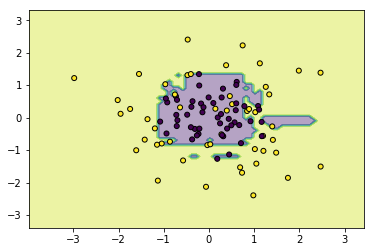

In [19]:
# Soft Voting
from sklearn.ensemble import VotingClassifier

eclf2 = VotingClassifier(estimators=[
            ('lr', LR_clf2), 
            ('dt', DT_clf), 
            ('knn', knn_clf),
            ('rf', RF_clf)],  
            voting='soft', 
            flatten_transform=True)

eclf2 = eclf2.fit(X1_train, y1_train)

print('Accuracy of Soft Voting classifier on training set: {:.2f}'
     .format(eclf2.score(X1_train, y1_train)))
print('Accuracy of Soft Voting classifier on test set: {:.2f}'
     .format(eclf2.score(X1_valid, y1_valid)))

plot_decision_boundary(eclf2, X1, y1)

We can also add weights for the option of 'soft' voting to weigh the probabilities of the classifiers

Accuracy of Weighted Soft Voting classifier on training set: 0.95
Accuracy of Weighted Soft Voting classifier on test set: 0.80


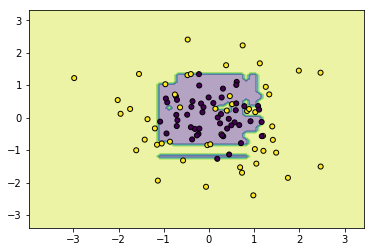

In [20]:
# Soft Voting with weights
from sklearn.ensemble import VotingClassifier

eclf3 = VotingClassifier(estimators=[
            ('lr', LR_clf2),
            ('knn', knn_clf),
            ('dt', DT_clf), 
            ('rf', RF_clf)],  
            voting='soft', 
            weights=[1, 2, 6, 10],
            flatten_transform=True)

eclf3 = eclf3.fit(X1_train, y1_train)

print('Accuracy of Weighted Soft Voting classifier on training set: {:.2f}'
     .format(eclf3.score(X1_train, y1_train)))
print('Accuracy of Weighted Soft Voting classifier on test set: {:.2f}'
     .format(eclf3.score(X1_valid, y1_valid)))

plot_decision_boundary(eclf3, X1, y1)

### Acknowledgements:

The credits for the images used above are as follows.
- Image 1 and 2: https://github.com/trekhleb/machine-learning-octave/tree/master/logistic-regression
- Image 6: https://towardsdatascience.com/derivative-of-the-sigmoid-function-536880cf918e
- Image 7: https://houxianxu.github.io/2015/04/23/logistic-softmax-regression/
- Image 8: https://rasbt.github.io/mlxtend/user_guide/general_concepts/gradient-optimization/
- Image 9: https://www.mathworks.com/matlabcentral/fileexchange/63621-knn-classifier
- Image 10: https://commons.wikimedia.org/wiki/File:SVM_margin.png
- Image 11: https://commons.wikimedia.org/wiki/File:Kernel_Machine.png

The inspiration for the code for the function `plot_decision_boundary` is taken from the following Github gist:
- https://gist.github.com/anandology/772d44d291a9daa198d4

References:
- [Applied Machine Learning in Python](https://www.coursera.org/learn/python-machine-learning?specialization=data-science-python) course by University of Michigan in Coursera